# Overfitting Challenge

## Objectives

1.   Practice implementing single **polynomial** linear regression.
2.   Create your own example of overfitting, so that **you** can recognize it in the wild.
3.   Break a dataset up into training and test sets in order to help **computers** spot overfitting more easily.





## Part 0: Raw Data

__To do__: Run the cell below to generate today's data set.

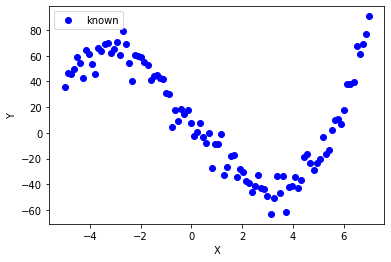

In [673]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(251)

# Known inputs + outputs (with noise)
n = 100
X_true = np.linspace(-5,7,n).reshape((n,1))
noise  = np.random.normal(0,7,(n,1))
W_true = np.array([[0.75, 0.0, -25.0, 10]]).T
Y_true = W_true[0,0]*X_true**3 + W_true[1,0]*X_true**2 + W_true[2,0]*X_true + W_true[3,0] + noise

# Plot the raw data to get a feel for the shape before worrying about the math.
plt.plot(X_true,Y_true, 'ob', label="known")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Part 1: Simple Linear Regression

Let's start by fitting a straight line ($y = mx+b$) to the data.

__To do__: 
1. Build your **input matrix**, $A$, with a column of data (or 1s) for each weight in the target model: $y=w_1x+w_0$.
2. Solve for the weights `W_simple` using **least squares minimization**: $W = (A^T A)^{-1}A^T Y$
3. Use your model to **predict** an output value $y^*$ for each known input $x_i$.
4. **Evaluate** this linear function's ability to predict the data by calculating its residuals, residual sum of squares (RSS), and coefficient of determination (R squared).

In [674]:
# 1. Build your input matrix, A: an (N, D+1) ndarray, where N is the number of 
#    samples in the dataset and D=1 is the degree of the polynomial model.
n = X_true.shape[0]
H_true = np.ones( (n,1) )
A_simple = np.hstack( (X_true, H_true) )
print("A:")
print(A_simple[:3,:])

# 2. Solve for the weights W_simple that optimize the model for polynomial degree D=1
# 𝑊 = (𝐴.𝑇 𝐴)−1 𝐴.𝑇 𝑌
W_simple = np.linalg.inv(A_simple.T @ A_simple) @ A_simple.T @ Y_true
print("W:")
print(W_simple)

# 3. Make predictions
Y_simple = A_simple @ W_simple

# 4. Evaluate the fit's mean residual, RSS, and R squared
R_simple = Y_true - Y_simple
mean_r_simple = np.mean( R_simple )
print("Mean residual:", mean_r_simple)

RSS_simple = np.sum(R_simple**2)
print("RSS:", RSS_simple)

mean_true = np.mean(Y_true)
SS_true = np.sum((Y_true - mean_true)**2)
RSq_simple = 1 - RSS_simple / SS_true
print("RSq:", RSq_simple)

A:
[[-5.          1.        ]
 [-4.87878788  1.        ]
 [-4.75757576  1.        ]]
W:
[[-5.9983314 ]
 [18.92350982]]
Mean residual: -4.405364961712621e-15
RSS: 126485.48883979734
RSq: 0.258296253743455


__To do__: Visualize the model you've found by copying and pasting the raw data visualization above, and superimposing your predictions on the graph as a line of best fit.

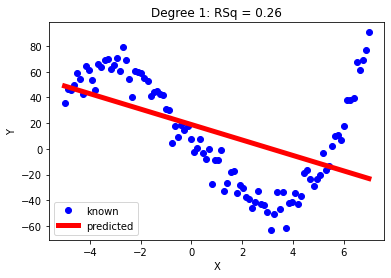

In [675]:
# 5. Visualize the line of best fit
plt.plot(X_true,Y_true, 'ob', label="known")
plt.plot( X_true, Y_simple, '-r', linewidth=5, label="predicted" )
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Degree 1: RSq = {RSq_simple:.2f}")
plt.legend()
plt.show()

Your model can also predict outputs for inputs that have never been seen before! Try it out, below:

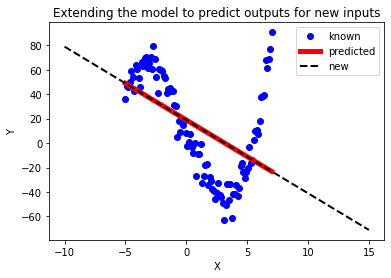

In [676]:
# Some new input values
n = 5
X_new = np.linspace(-10,15,n).reshape((n,1))
H_new = np.ones((n,1))
A_new = np.hstack((X_new, H_new))

# Predict outputs at these new locations
Y_new = A_new @ W_simple

# Visualize the results
plt.plot(X_true,Y_true, 'ob', label="known")
plt.plot( X_true, Y_simple, '-r', linewidth=5, label="predicted" )
plt.plot( X_new, Y_new, '--k', linewidth=2, label="new" )
plt.xlabel("X")
plt.ylabel("Y")
plt.title( "Extending the model to predict outputs for new inputs" )
plt.legend()
plt.show()

## Part 2: Cubic Linear Regression

__To do__: 

1. Copy and paste your simple linear regression code above, and adapt it to fit a 3rd order polynomial (cubic) to the data.

2. Visualize your model by superimposing the line of best fit on a plot of the raw data.

3. Evaluate the model's performance.

W:
[[ 7.35250907e-01]
 [ 1.61264585e-02]
 [-2.44364329e+01]
 [ 9.40904639e+00]]
Mean residual: -9.450218385609333e-15
RSS: 6163.0302337184585
RSq: 0.9638603395964971
MSE 10:  61.63030233718459


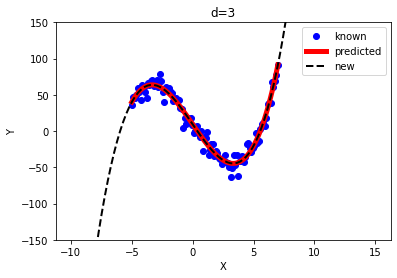

In [677]:
# 3rd order polynomial fit

# 1. Build your input matrix, A: an (N, D+1) ndarray, where N is the number of 
#    samples in the dataset and D=3 is the degree of the polynomial model.
A_cubic = np.hstack((X_true**3, X_true**2, X_true, H_true))

n = 100
X_new = np.linspace(-10,15,n).reshape((n,1))
H_new = np.ones((n,1))
A_new = np.hstack((X_new**3, X_new**2, X_new, H_new))

# 2. Solve for the weights W_cubic that optimize the model for polynomial degree D=3
W_cubic = np.linalg.inv(A_cubic.T @ A_cubic) @ A_cubic.T @ Y_true
print("W:")
print(W_cubic)

# 3. Make predictions
Y_cubic = A_cubic @ W_cubic
Y_new = A_new @ W_cubic


# 4. Evaluate the fit's residuals, RSS, R squared, and MSE (mean squared error)
R_cubic = Y_true - Y_cubic
mean_r_cubic = np.mean( R_cubic )
print("Mean residual:", mean_r_cubic)

RSS_cubic = np.sum(R_cubic**2)
print("RSS:", RSS_cubic)

mean_true = np.mean(Y_true)
SS_true = np.sum((Y_true - mean_true)**2)
RSq_cubic = 1 - RSS_cubic / SS_true
print("RSq:", RSq_cubic)

MSE_cubic = RSS_cubic / R_cubic.shape[0]
print("MSE 10: ", MSE_cubic)

# 5. Visualize the line of best fit
plt.plot(X_true,Y_true, 'ob', label="known")
plt.plot(X_true, Y_cubic, '-r', linewidth=5, label="predicted")
plt.plot(X_new, Y_new, '--k', linewidth=2, label="new")
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim([-150, 150])
plt.title("d=3")
plt.legend()
plt.show()


## Part 3: 10th-Order Polynomial

__To do__: 

1. Copy and paste your simple linear regression code above, and adapt it to fit a 3rd order polynomial (cubic) to the data.

>> *Hint: We can write a __loop__ to automate the construction of the N-by-11 input matrix, $A$.* __It's OK to use a loop to build A in your project, as well.__

2. Visualize your model by superimposing the line of best fit on a plot of the raw data.

3. Evaluate the model's performance.

W:
[[-2.40999552e-05]
 [ 2.61193313e-04]
 [ 9.32376646e-04]
 [-1.57851964e-02]
 [-2.56616688e-03]
 [ 3.23215190e-01]
 [-2.19294926e-01]
 [-1.72955710e+00]
 [ 2.03348241e+00]
 [-1.96026488e+01]
 [ 6.76885598e+00]]
Mean residual: -1.2531616278010916e-09
RSS: 5536.571036705664
RSq: 0.9675338608641404
MSE 10:  55.365710367056636


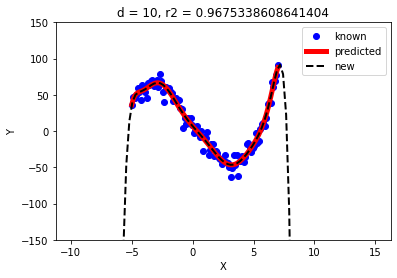

In [678]:
# 10th order polynomial fit

# 1. Build your input matrix, A: an (N, D+1) ndarray, where N is the number of 
#    samples in the dataset and D=3 is the degree of the polynomial model.
A_10 = np.hstack((X_true**10, X_true**9, X_true**8, X_true**7, X_true**6, X_true**5, X_true**4, X_true**3, X_true**2, X_true, H_true))

n = 100
X_new = np.linspace(-10,15,n).reshape((n,1))
H_new = np.ones((n,1))
A_new = np.hstack((X_new**10, X_new**9, X_new**8, X_new**7, X_new**6, X_new**5, X_new**4, X_new**3, X_new**2, X_new, H_new))

# 2. Solve for the weights W_10 that optimize the model for polynomial degree D=10
W_10 = np.linalg.inv(A_10.T @ A_10) @ A_10.T @ Y_true
print("W:")
print(W_10)

# 3. Make predictions
Y_10 = A_10 @ W_10
Y_new = A_new @ W_10

# 4. Evaluate the fit's residuals, RSS, R squared, and MSE (mean squared error)
R_10 = Y_true - Y_10
mean_r_10 = np.mean( R_10 )
print("Mean residual:", mean_r_10)

RSS_10 = np.sum(R_10**2)
print("RSS:", RSS_10)

mean_true = np.mean(Y_true)
SS_true = np.sum((Y_true - mean_true)**2)
RSq_10 = 1 - RSS_10 / SS_true
print("RSq:", RSq_10)

MSE_10 = RSS_10 / R_10.shape[0]
print("MSE 10: ", MSE_10)

# 5. Visualize the line of best fit along with the raw data
plt.plot(X_true,Y_true, 'ob', label="known")
plt.plot(X_true, Y_10, '-r', linewidth=5, label="predicted")
plt.plot(X_new, Y_new, '--k', linewidth=2, label="new")
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim([-150, 150])
plt.title("d = 10, r2 = " + str(RSq_10))
plt.legend()
plt.show()

## Part 4: Overfitting

We can see that an order 10 polynomial did an even better job predicting our data than a cubic model, even though the dataset was generated by a cubic function. How can this be? Is a higher order polynomial always better?

Let's take 2 steps to find out:

### Step 1: Visualizing Overfitting

Let's first try a quick, visual **sanity check**: 

Extend both the 3rd and 10th order models beyond the limits of our training set, like we did for the simple linear regression in part 1. Which extended model looks more plausible?

__To do__: Use each of your 3 models to redict outputs for the new input values, `X_new`.

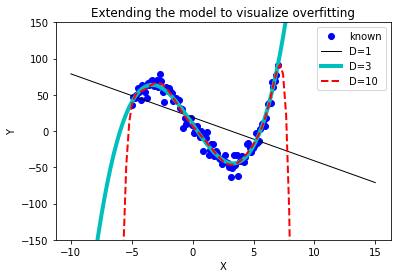

In [679]:
# Some new input values
n = 100
X_new = np.linspace(-10,15,n).reshape((n,1))
H_new = np.ones((n,1))


# Predict the output of each model at these new locations.
# NOTE: You may have to change the names of the weight matrices, W, to match your own
# variable names from above!
A_new1 = np.hstack((X_new, H_new))
Y_new1 = A_new1 @ W_simple

A_new3 = np.hstack((X_new**3, X_new**2, X_new, H_new))
Y_new3 = A_new3 @ W_cubic

A_new10 = np.hstack((X_new**10, X_new**9, X_new**8, X_new**7, X_new**6, X_new**5, X_new**4, X_new**3, X_new**2, X_new, H_new))
Y_new10 = A_new10 @ W_10

# Visualize the results
plt.plot(X_true,Y_true, 'ob', label="known")
plt.plot( X_new, Y_new1, '-k', linewidth=1, label="D=1" )
plt.plot( X_new, Y_new3, '-c', linewidth=4, label="D=3" )
plt.plot( X_new, Y_new10, '--r', linewidth=2, label="D=10" )
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim([-150, 150])
plt.title( "Extending the model to visualize overfitting" )
plt.legend()
plt.show()

### Step 2: Quantifying Overfitting

Now let's **measure** how increasing the model's complexity can degrade our ability to accurately predict the output.

First, split the dataset into 2 chunks: a **training set** and a **validation set**.
* Sample order must be randomized! Boolean indexing or shuffling ([`numpy.random.shuffle()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.shuffle.html)) will help.
* Make sure that the Y-values in each set still correspond to the correct X-values.

Then, solve for the weights using only the training set.

Finally, use the R squared value of each model's predictions relative to the validation set to measure how well the trained model **generalizes** to new inputs.

In [680]:
# Train regression model
def stats(Y, Y_pred):
    R = Y - Y_pred
    mean_r = np.mean( R )
    print("Mean residual:", mean_r)

    RSS = np.sum(R**2)
    print("RSS:", RSS)

    mean = np.mean(Y)
    SS = np.sum((Y - mean)**2)
    RSq = 1 - RSS / SS
    print("RSq:", RSq)

    MSE = RSS / R_train.shape[0]
    print("MSE: ", MSE)

def regression(degree=1, n_train=n_train, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    '''
    Create model with training data and test it with testing data.
    \nINPUTS: Polynomial model degree, n_train (for H_test shape), X and Y training set, X and Y testing set.
    \nOUTPUTS: Returns nothing and plots regression models.
    '''
    plt.figure()
    plt.plot( X_train, Y_train, 'ok', label = 'train')
    plt.plot( X_test, Y_test, 'rx', label = 'test')

    # Train model
    H_train = np.ones((n_train, 1))
    A_train = H_train
    for d in range(degree):
        A_train = np.hstack((X_train**(d + 1), A_train))
    W = np.linalg.inv(A_train.T @ A_train) @ A_train.T @ Y_train
    Y_pred_train = A_train @ W
    plt.plot( X_train, Y_pred_train, 'bd', label="D={0} train".format(degree))

    print("\nTraining set stats (D={0}):".format(degree))
    stats(Y_train, Y_pred_train)

    # Test model
    H_test = np.ones((n-n_train, 1))
    A_test = H_test
    for d in range(degree):
        A_test = np.hstack((X_test**(d + 1), A_test))
    Y_pred_test = A_test @ W

    print("\nTesting set stats (D={0}):".format(degree))
    stats(Y_test, Y_pred_test)

    plt.plot( X_test, Y_pred_test, 'cx', label="D={0} test".format(degree))
    plt.legend()
    plt.show()

# Partition dataset into training and test
n = X_true.shape[0]

# Shuffle values preserving X and Y pairs.
XY_true = np.hstack((X_true, Y_true))
np.random.shuffle(XY_true)
X_shuffled = XY_true[:,0].reshape((n,1))
Y_shuffled = XY_true[:,1].reshape((n,1))

# Assign shuffled values to training and test sets.
n_train = int( n*0.60 )
X_train = X_shuffled[ 0:n_train, : ]
X_test = X_shuffled[ n_train:n, : ]
Y_train = Y_shuffled[ 0:n_train, : ]
Y_test = Y_shuffled[ n_train:n, : ]

regression(1)
regression(3)
regression(10)


Training set stats (D=1):


TypeError: stats() takes 2 positional arguments but 3 were given